In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Let's look at sum of all names before 1990

In [2]:
df = pd.read_csv('./StateNames.csv')
after1990 = df[df['Year'] > 1990]
before1990 = df[df['Year'] <= 1990]

after_by_state = after1990.groupby(['State','Name'], as_index=False)['Count'].aggregate({'Count' : 'sum'})
after_by_state_sorted = after_by_state.sort_values(by=['Count'],ascending=False)
after_by_state_grouped = after_by_state_sorted.groupby("State", as_index=False).first()
after_by_state_grouped

,State,Name,Count
0,AK,Michael,1719
1,AL,William,13931
2,AR,Jacob,6258
3,AZ,Michael,13433
4,CA,Daniel,97807
5,CO,Jacob,9986
6,CT,Michael,11829
7,DC,Michael,2706
8,DE,Michael,2587
9,FL,Michael,41742


In [28]:
before_by_state = before1990.groupby(['State','Name'], as_index=False)['Count'].aggregate({'Count' : 'sum'})
before_by_state_sorted = before_by_state.sort_values(by=['Count'],ascending=False)
before_by_state_grouped = before_by_state_sorted.groupby("State", as_index=False).first()
before_by_state_grouped

,State,Name,Count
0,AK,Michael,6355
1,AL,James,146670
2,AR,James,80151
3,AZ,Michael,31490
4,CA,Michael,338592
5,CO,Robert,43518
6,CT,John,72793
7,DC,John,31943
8,DE,John,13446
9,FL,James,115859


In [37]:
most_pop_names_before = before_by_state_grouped.groupby(['Name'], 
                                                as_index=False)['Count'].aggregate({'Count' : 'sum'})
most_pop_names_after = after_by_state_grouped.groupby(['Name'], 
                                                as_index=False)['Count'].aggregate({'Count' : 'sum'})
most_pop_names_before

,Name,Count
0,David,24097
1,James,1926933
2,John,1445026
3,Mary,23379
4,Michael,396889
5,Robert,1460539


# Popular names in each state

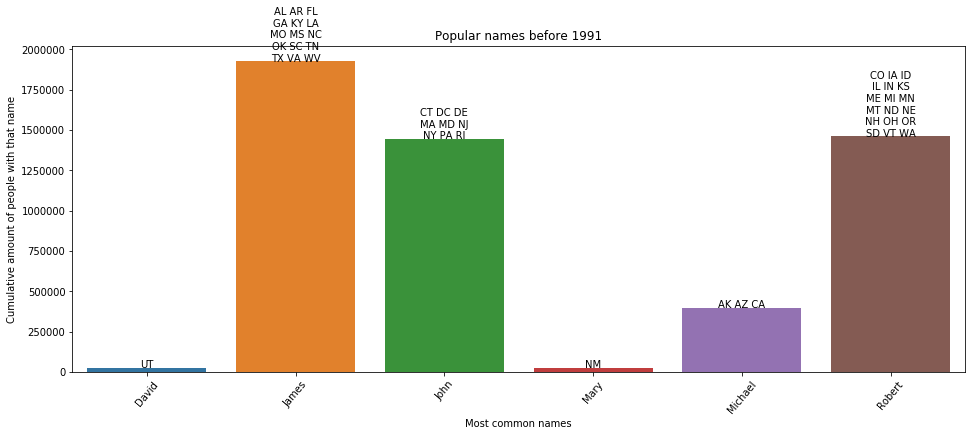

In [39]:
plt.figure(figsize=(16, 6))
gr = sns.barplot(x='Name', y='Count', ci=None, data=most_pop_names_before)
gr.set_xticklabels(gr.get_xticklabels(), rotation=50,)
gr.set(xlabel='Most common names', ylabel='Cumulative amount of people with that name')
gr.set_title("Popular names before 1991")
for index, row in most_pop_names_before.iterrows():
    states = before_by_state_grouped[before_by_state_grouped.Name == row.Name].State.to_list()
    states_p = "\n".join([" ".join([prev,c,n]) for prev, c, n in zip(states[::3], states[1::3], states[2::3])])
    if len(states) == 1:
        states_p = states[0]
    gr.text(index,
            row.Count,
            states_p, 
            color='black',
            ha="center")

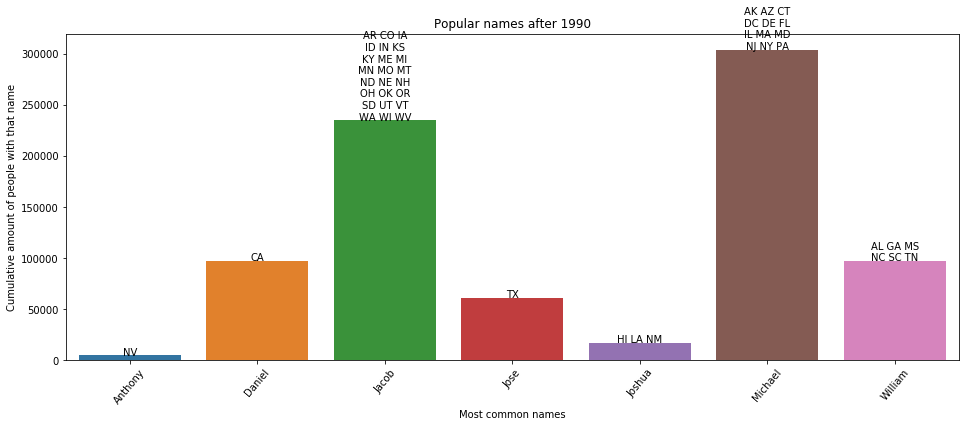

In [31]:
plt.figure(figsize=(16, 6))
gr = sns.barplot(x='Name', y='Count', ci=None, data=most_pop_names_after)
gr.set_xticklabels(gr.get_xticklabels(), rotation=50,)
gr.set(xlabel='Most common names', ylabel='Cumulative amount of people with that name')
gr.set_title("Popular names after 1990")
for index, row in most_pop_names_after.iterrows():
    states = after_by_state_grouped[after_by_state_grouped.Name == row.Name].State.to_list()
    states_p = "\n".join([" ".join([prev,c,n]) for prev, c, n in zip(states[::3], states[1::3], states[2::3])])
    if len(states) == 1:
        states_p = states[0]
    gr.text(index,
            row.Count,
            states_p, 
            color='black',
            ha="center")


## Three most popular names among girls in three states

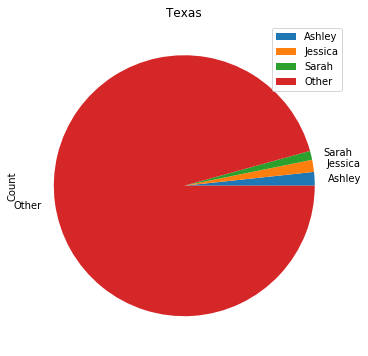

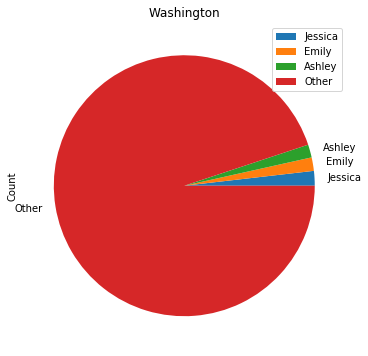

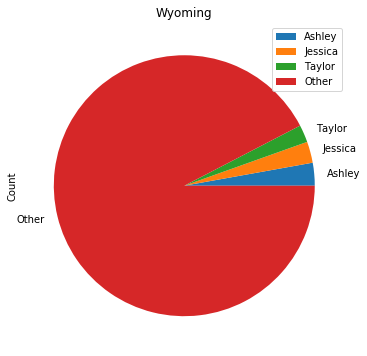

In [6]:
top3_df_f = df[(df.Year >= 1990) & (df.Year <= 2000) & (df.Gender == "F") & (df.State.isin(["TX", "WA", "WY"])) ]
top3_group_f = top3_df_f.groupby(['State','Name'], as_index=False)['Count'].aggregate({'Count' : 'sum'})
top3_sorted_f = top3_group_f.sort_values(by=['Count'],ascending=False)
kek_f = top3_sorted_f.groupby("State", as_index=False).nth(list(range(3)))

def plot_pie_state(state, title, data, gender_df):
    kek_state = data[data["State"] == state]
    kek_state = kek_state.append({"State": state, 
                                  "Name": "Other", 
                                  "Count": sum(gender_df[gender_df["State"] == state].Count)},
                                  ignore_index=True)
    kek_state = kek_state.set_index("Name")
    plot_state = kek_state[kek_state["State"] == state].plot.pie(y='Count', figsize=(16, 6), title=title)
    
top_f_tx = kek_f[kek_f.State == "TX"].Name.to_list()
plot_pie_state("TX", "Texas", kek_f, top3_df_f)

top_f_wa = kek_f[kek_f.State == "WA"].Name.to_list()
plot_pie_state("WA", "Washington", kek_f, top3_df_f)

top_f_wy = kek_f[kek_f.State == "WY"].Name.to_list()
plot_pie_state("WY", "Wyoming", kek_f, top3_df_f)

## Three most popular names among boys in three states

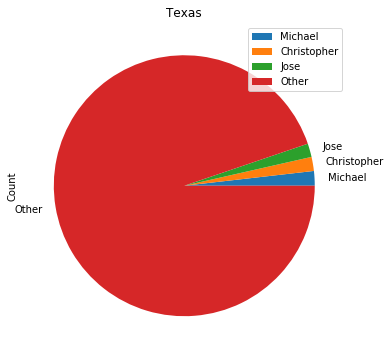

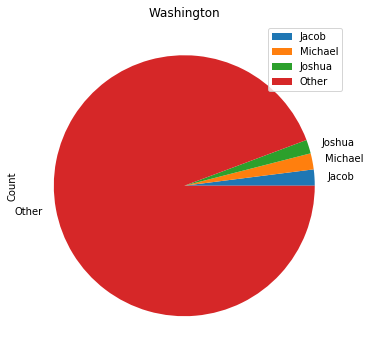

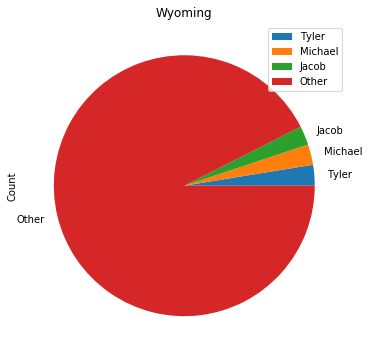

In [7]:
top3_df_m = df[(df.Year >= 1990) & (df.Year <= 2000) & (df.Gender == "M") & (df.State.isin(["TX", "WA", "WY"])) ]
top3_group_m = top3_df_m.groupby(['State','Name'], as_index=False)['Count'].aggregate({'Count' : 'sum'})
top3_sorted_m = top3_group_m.sort_values(by=['Count'],ascending=False)
kek_m = top3_sorted_m.groupby("State", as_index=False).nth(list(range(3)))

top_m_tx = kek_m[kek_m.State == "TX"].Name.to_list()
plot_pie_state("TX", "Texas", kek_m, top3_df_m)

top_m_wa = kek_m[kek_m.State == "WA"].Name.to_list()
plot_pie_state("WA", "Washington", kek_m, top3_df_m)

top_m_wy = kek_m[kek_m.State == "WY"].Name.to_list()
plot_pie_state("WY", "Wyoming", kek_m, top3_df_m)


## Dynamics of popularity of names of girls

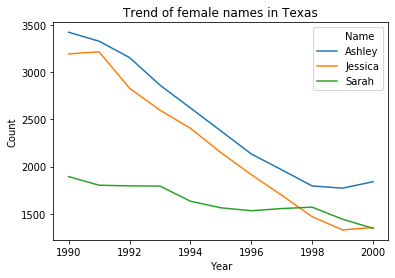

In [20]:
sub_df_f = df[(df.Year >= 1990) & (df.Year <= 2000) & (df.Gender == "F") & (df.State.isin(["TX", "WA", "WY"]))]
years_f_tx = sub_df_f[(sub_df_f.State == "TX") & (sub_df_f.Name.isin(top_f_tx))]
years_f_tx_plot = sns.lineplot(x=years_f_tx.Year, 
                               y=years_f_tx.Count, 
                               hue=years_f_tx.Name,).set_title("Trend of female names in Texas")

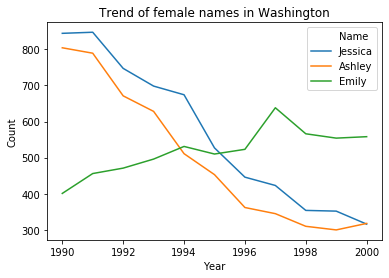

In [21]:
years_f_wa = sub_df_f[(sub_df_f.State == "WA") & (sub_df_f.Name.isin(top_f_wa))]
years_f_wa_plot = sns.lineplot(x=years_f_wa.Year, 
                               y=years_f_wa.Count, 
                               hue=years_f_wa.Name,).set_title("Trend of female names in Washington")

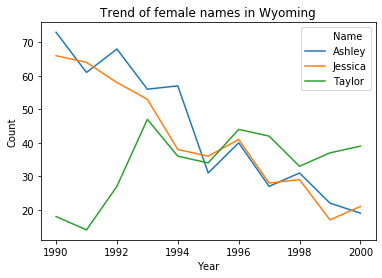

In [22]:
years_f_wy = sub_df_f[(sub_df_f.State == "WY") & (sub_df_f.Name.isin(top_f_wy))]
years_f_wy_plot = sns.lineplot(x=years_f_wy.Year, 
                               y=years_f_wy.Count, 
                               hue=years_f_wy.Name,).set_title("Trend of female names in Wyoming")

## Dynamics of popularity of names of boys

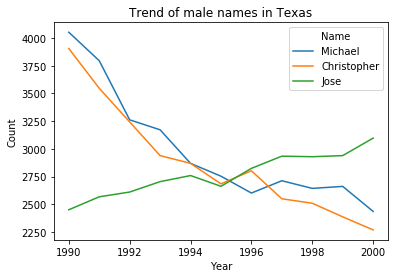

In [23]:
sub_df_m = df[(df.Year >= 1990) & (df.Year <= 2000) & (df.Gender == "M") & (df.State.isin(["TX", "WA", "WY"]))]
years_m_tx = sub_df_m[(sub_df_m.State == "TX") & (sub_df_m.Name.isin(top_m_tx))]
years_m_tx_plot = sns.lineplot(x=years_m_tx.Year, 
                               y=years_m_tx.Count, 
                               hue=years_m_tx.Name,).set_title("Trend of male names in Texas")



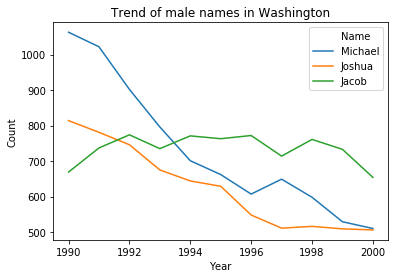

In [24]:
years_m_wa = sub_df_m[(sub_df_m.State == "WA") & (sub_df_m.Name.isin(top_m_wa))]
years_m_wa_plot = sns.lineplot(x=years_m_wa.Year, 
                               y=years_m_wa.Count, 
                               hue=years_m_wa.Name,).set_title("Trend of male names in Washington")

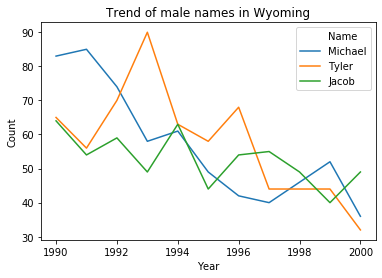

In [25]:
years_m_wy = sub_df_m[(sub_df_m.State == "WY") & (sub_df_m.Name.isin(top_m_wy))]
years_m_wy_plot = sns.lineplot(x=years_m_wy.Year, 
                               y=years_m_wy.Count, 
                               hue=years_m_wy.Name,).set_title("Trend of male names in Wyoming")